# Examples of plots

In [1]:
import torch
from matplotlib import pyplot as plt

## transfer learning

In [24]:
main_path_tl = "./output/dormammu/output/MNIST-KMNIST-Letters-FashionMNIST-CIFARMNIST/transfer/torch.float64/240425-132738_nsample=2_maxpool_ReLU-ReLU-ReLU-ReLU-ReLU/"
loss_and_acc_paths = {
    dataset: f"{main_path_tl}base=MNIST_target={dataset}/loss_and_acc_during_transfer_learning_fixed_bs=4_workers=4_lr=0.001.pt" for dataset in ['KMNIST', 'Letters', 'FashionMNIST', 'CIFARMNIST']
}

In [25]:
loss_dict = {}
acc_dict = {}
for dataset, path in loss_and_acc_paths.items():
    loss_dict[dataset], acc_dict[dataset] = torch.load(path)

In [26]:
colors = plt.cm.rainbow(torch.linspace(0, 1, len(loss_and_acc_paths.keys()) + 1))[1:]
colors

array([[1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [29]:
for i, (dataset, acc) in enumerate(acc_dict.items()):
    print(dataset, acc['val'][-1].item())

KMNIST 0.7498
Letters 0.7989423076923077
FashionMNIST 0.8071
CIFARMNIST 0.3311


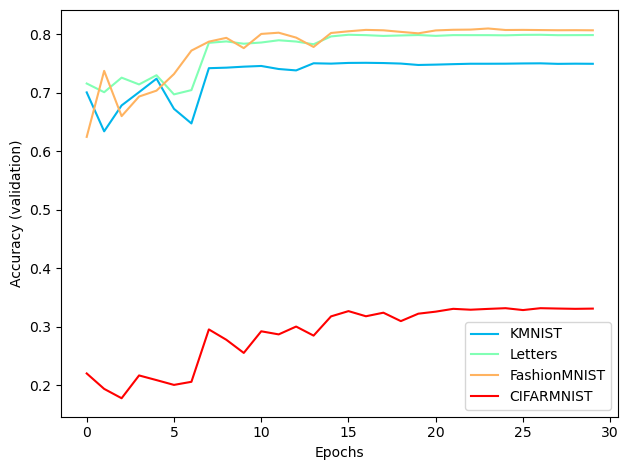

In [34]:
for i, (dataset, acc) in enumerate(acc_dict.items()):
    # print(acc['val'])
    plt.plot(acc['val'], label=f"{dataset}", linestyle='-', color=colors[i])
plt.ylabel("Accuracy (validation)")
plt.xlabel("Epochs")
plt.legend()
plt.tight_layout()
plt.savefig(main_path_tl + "comparison_accuracies_validation.pdf", )
plt.show()
# plt.savefig(saving_path, transparent=True, dpi=None)

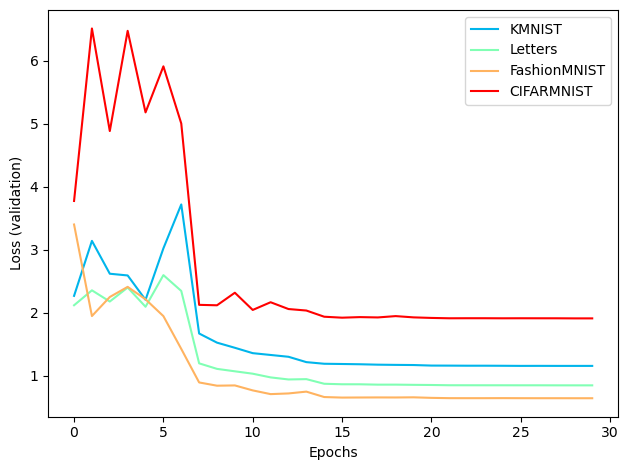

In [28]:
for i, (dataset, loss) in enumerate(loss_dict.items()):
    # print(loss['val'])
    plt.plot(loss['val'], label=f"{dataset}", linestyle='-', color=colors[i])
plt.ylabel("Loss (validation)")
plt.xlabel("Epochs")
plt.legend()
plt.tight_layout()
plt.savefig(main_path_tl + "comparison_loss_validation.pdf", )
plt.show()
# plt.savefig(saving_path, transparent=True, dpi=None)

## Compare traces

In [4]:
main_path_traces = "./output/dormammu/output/MNIST-KMNIST-Letters-FashionMNIST-CIFARMNIST-Noise/traces/torch.float64/240426-113250_nsample=250_maxpool_ReLU-ReLU-ReLU-ReLU-ReLU-ReLU/"
experiment_paths_traces = {
    dataset: f"{main_path_traces}experiment_{dataset}_traces.pt" for dataset in ['MNIST', 'KMNIST', 'Letters', 'FashionMNIST', 'CIFARMNIST', 'Noise']
}
nb_experiments_traces = len(experiment_paths_traces.keys())

In [4]:
colors = plt.cm.rainbow(torch.linspace(0, 1, nb_experiments_traces + 1))[1:]
colors

array([[1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 4.94655843e-01, 2.55842778e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [8]:
for i, (dataset, path) in enumerate(experiment_paths_traces.items()):
    traces = torch.load(path)
    print(dataset, traces.mean().item(), traces.median().item())

MNIST -1.5212071007697876 -1.5183557615309002
KMNIST -0.006318653691391198 0.3653579193234811
Letters 0.04255103017379785 0.48276737622723004
FashionMNIST -0.14455048532376435 0.12430516808433169
CIFARMNIST -0.06265860381062259 0.26908900054110096
Noise 0.19438783411103638 0.2681383287816658


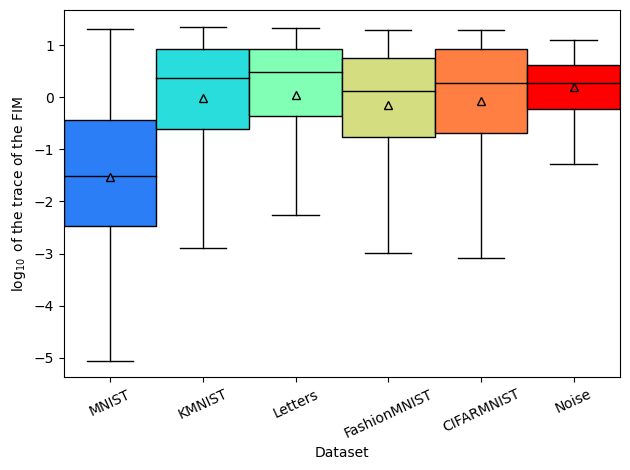

In [5]:
_, axes = plt.subplots()
for i, (dataset, path) in enumerate(experiment_paths_traces.items()):
    traces = torch.load(path)
    face_color=colors[i]
    boxplot = axes.boxplot(traces,
                            positions=[i],
                            widths=1,
                            sym='',
                            patch_artist=True,
                            boxprops=dict(facecolor=face_color),
                            medianprops=dict(color='black'),
                            meanprops=dict(markeredgecolor='black', markerfacecolor=face_color),
                            showmeans=True
                            )
axes.set_xticks(torch.arange(nb_experiments_traces), [dataset for dataset in experiment_paths_traces.keys()], rotation=25)
axes.set_ylabel(r"$\log_{10}$ of the trace of the FIM")
axes.set_xlabel("Dataset")

# plt.tight_layout()
plt.savefig(f"{main_path_traces}trace_comparison_notebook.pdf", transparent=True, dpi=None)
plt.show()


## Compare eigenvalues

In [2]:
main_path_ev = "output/dormammu/output/MNIST-KMNIST-Letters-FashionMNIST-CIFARMNIST-Noise/compare/torch.float64/240425-094143_nsample=250_maxpool_ReLU-ReLU-ReLU-ReLU-ReLU-ReLU/"
experiment_paths_ev = {
    dataset: f"{main_path_ev}experiment_{dataset}_orderd_list_eigenvalues.pt" for dataset in ['MNIST', 'KMNIST', 'Letters', 'FashionMNIST', 'CIFARMNIST', 'Noise']
}
nb_experiments_ev = len(experiment_paths_ev.keys())

In [3]:
colors = plt.cm.rainbow(torch.linspace(0, 1, nb_experiments_ev + 1))[1:]
colors

array([[1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 4.94655843e-01, 2.55842778e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [8]:
print("-"*5 + "lowest" + "-"*5)
for i, (dataset, path) in enumerate(experiment_paths_ev.items()):
    oredered_list_eigenvalues = torch.load(path)
    print(dataset,oredered_list_eigenvalues[-2].mean().item(), oredered_list_eigenvalues[-2].median().item())

print("-"*5 + "highest" + "-"*5)
for i, (dataset, path) in enumerate(experiment_paths_ev.items()):
    oredered_list_eigenvalues = torch.load(path)
    print(dataset, oredered_list_eigenvalues[0].mean().item(), oredered_list_eigenvalues[0].median().item())


print("-"*5 + "delta" + "-"*5)
for i, (dataset, path) in enumerate(experiment_paths_ev.items()):
    oredered_list_eigenvalues = torch.load(path)
    highest_log_mean = oredered_list_eigenvalues[0].mean()
    highest_log_median = oredered_list_eigenvalues[0]
    lowest_log_mean = oredered_list_eigenvalues[-2].mean()
    lowest_log_median = oredered_list_eigenvalues[-2]
    delta_log_mean = (highest_log_mean - lowest_log_mean)
    delta_log_median = (highest_log_median - lowest_log_median).median()
    highest_mean = (10 ** oredered_list_eigenvalues[0]).mean()
    highest_median = (10 ** oredered_list_eigenvalues[0]).median()
    lowest_mean = (10 ** oredered_list_eigenvalues[-2]).mean()
    lowest_median = (10 ** oredered_list_eigenvalues[-2]).median()
    delta_mean = (highest_mean - lowest_mean)
    delta_median = (highest_median - lowest_median)
    print(dataset, delta_log_mean.item(), delta_log_median.item(), delta_mean.item(), delta_median.item(), highest_median.item())

# spread in eigenvalues (quantile difference)
print("-"*5 + "quantile diff" + "-"*5)
for i, (dataset, path) in enumerate(experiment_paths_ev.items()):
    print(dataset)
    ordered_list_eigenvalues = torch.load(path)
    ordered_tensor_eigenvalues = torch.stack(ordered_list_eigenvalues, dim=0)
    highest_log_quantile = ordered_tensor_eigenvalues.quantile(q=0.9, dim=1)
    lowest_log_quantile =  ordered_tensor_eigenvalues.quantile(q=0.1, dim=1)
    print((highest_log_quantile[:-1] - lowest_log_quantile[:-1]).mean().item())

print("-"*5 + "std" + "-"*5)
for i, (dataset, path) in enumerate(experiment_paths_ev.items()):
    print(dataset)
    ordered_list_eigenvalues = torch.load(path)
    ordered_tensor_eigenvalues = torch.stack(ordered_list_eigenvalues, dim=0)
    ordered_eigenvalues_std = ordered_tensor_eigenvalues.std(dim=1)
    print((ordered_eigenvalues_std[:-1]).mean().item())


-----lowest-----
MNIST -9.018473646149028 -8.575108654373624
KMNIST -8.167023577234145 -7.754590145015147
Letters -8.348131075725107 -7.985592373372264
FashionMNIST -8.206525235910522 -8.084503514858982
CIFARMNIST -7.257659288351944 -6.904686583071566
Noise -5.389646508437468 -5.357071280148013
-----highest-----
MNIST -1.9302627536498007 -1.7821303591392155
KMNIST 0.006045632354666306 0.4939783885335108
Letters -0.2558665241467522 0.11123731223561237
FashionMNIST -0.24475906571938782 0.13767406690677303
CIFARMNIST -0.02177564249524721 0.4105214387375323
Noise 0.1843063843931006 0.24495792330447635
-----delta-----
MNIST 7.088210892499227 6.703198008695305 0.5091259411851573 0.016514657488078056 0.016514660148137524
KMNIST 8.173069209588812 7.763359457996979 4.082173410974089 3.1187343674258488 3.118734385021683
Letters 8.092264551578355 7.8225056629832 3.00073577344689 1.2919250191167415 1.2919250294540536
FashionMNIST 7.961766170191135 7.763105540958591 2.8889077635162015 1.37301115068

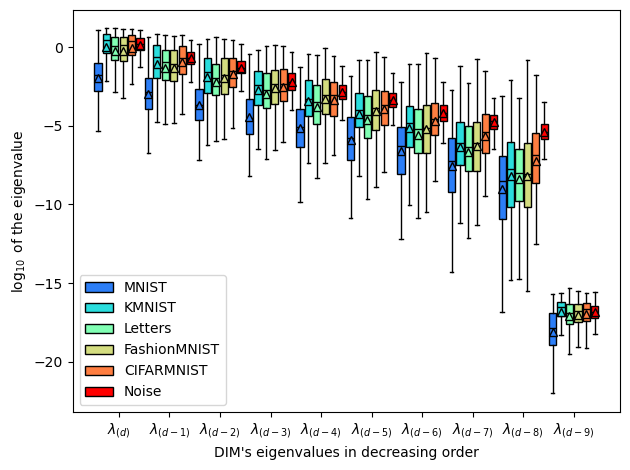

In [5]:
_, axes = plt.subplots()
bp_list = []
base_output_dimension = 10
for i, (dataset, path) in enumerate(experiment_paths_ev.items()):
    oredered_list_eigenvalues = torch.load(path)
    face_color=colors[i]
    boxplot = axes.boxplot(oredered_list_eigenvalues,
                            positions=torch.arange(0, base_output_dimension) + (i / nb_experiments_ev),
                            widths=1 / (nb_experiments_ev + 1),
                            sym='',
                            patch_artist=True,
                            boxprops=dict(facecolor=face_color),
                            medianprops=dict(color='black'),
                            meanprops=dict(markeredgecolor='black', markerfacecolor=face_color),
                            showmeans=True
                            )
    bp_list.append(boxplot)

axes.set_xticks(torch.arange(base_output_dimension) + ((nb_experiments_ev - 1) / nb_experiments_ev) / 2, [r"$\lambda_{(d" + (f"-{i}" if i>0 else "") + r")}$" for i in range( base_output_dimension)])
axes.set_ylabel(r"$\log_{10}$ of the eigenvalue")
axes.set_xlabel("DIM's eigenvalues in decreasing order")
plt.legend([bp['boxes'][0] for bp in bp_list], [dataset for dataset in experiment_paths_ev.keys()])

plt.tight_layout()
plt.savefig(f"{main_path_ev}eigenvalues_comparison_notebook.pdf", transparent=True, dpi=None)
plt.show()
